此笔记本会将文本形式的影评分为“正面”或“负面”影评。这是一个二元分类（又称为两类分类）的示例，也是一种重要且广泛适用的机器学习问题。
IMDB数据集包含互联网电影库50000多条电影评论，包括正负面

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

imdb = keras.datasets.imdb

tf.estimator package not installed.
tf.estimator package not installed.


In [3]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()

In [10]:
vocab_size = len(word_index)

In [8]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,value = 0.0,padding='post',maxlen=256)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,value = 0.0, padding='post',maxlen=256)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.summary()

In [14]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

In [15]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [18]:
history = model.fit(x=partial_x_train,y=partial_y_train,epochs=10,batch_size=64,validation_data=(x_val,y_val),verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 7s 498us/step - loss: 0.1683 - acc: 0.9405 - val_loss: 0.2862 - val_acc: 0.8852
Epoch 2/10
15000/15000 [==============================] - 8s 501us/step - loss: 0.1522 - acc: 0.9480 - val_loss: 0.2894 - val_acc: 0.8850
Epoch 3/10
15000/15000 [==============================] - 7s 498us/step - loss: 0.1379 - acc: 0.9539 - val_loss: 0.2923 - val_acc: 0.8876
Epoch 4/10
15000/15000 [==============================] - 7s 500us/step - loss: 0.1233 - acc: 0.9605 - val_loss: 0.3042 - val_acc: 0.8838
Epoch 5/10
15000/15000 [==============================] - 8s 515us/step - loss: 0.1100 - acc: 0.9655 - val_loss: 0.3105 - val_acc: 0.8845
Epoch 6/10
15000/15000 [==============================] - 8s 549us/step - loss: 0.0987 - acc: 0.9714 - val_loss: 0.3246 - val_acc: 0.8832
Epoch 7/10
15000/15000 [==============================] - 9s 599us/step - loss: 0.0874 - acc: 0.9761 - val_loss: 0.3345 - 

In [19]:
model.evaluate(test_data,test_labels)

25000/25000 [==============================] - 1s 26us/step


[0.4085956842446327, 0.86732]

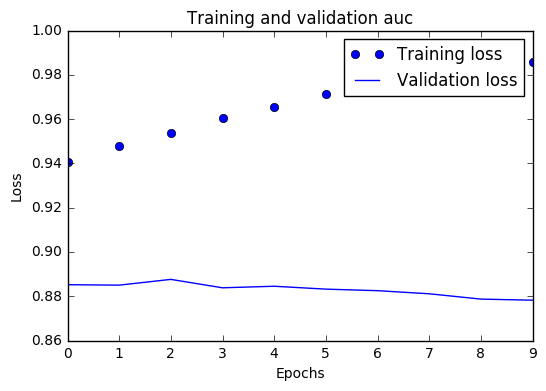

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(10)

plt.plot(epochs, acc, 'bo', label='Training loss')

# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation loss')

plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()